<a href="https://colab.research.google.com/github/Shawnequa/Drug200-/blob/main/Drug200_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Reference Information & Descriptions

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns


2. Data Ingestion

In [2]:
df = pd.read_csv('/content/drug200.csv')

3. Set initial options

In [3]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 40)
df.head()
df.tail
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


4. Map categorical features to numerical values

In [4]:
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['BP'] = df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})

5. Split the data into features (X) and target (y)

In [7]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol']]
y = df['Drug']

6. Split the data into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7. Train a Decision Tree Model

In [11]:
# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

8. Export the Decision Tree using export_graphviz()

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT format
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=model.classes_,
                           filled=True, rounded=True,
                           special_characters=True)

# Use graphviz to render the DOT file
graph = graphviz.Source(dot_data)
graph.render("drug_tree")  # Saves the tree as a PDF or other supported formats
graph

9. Plot the Decision Tree

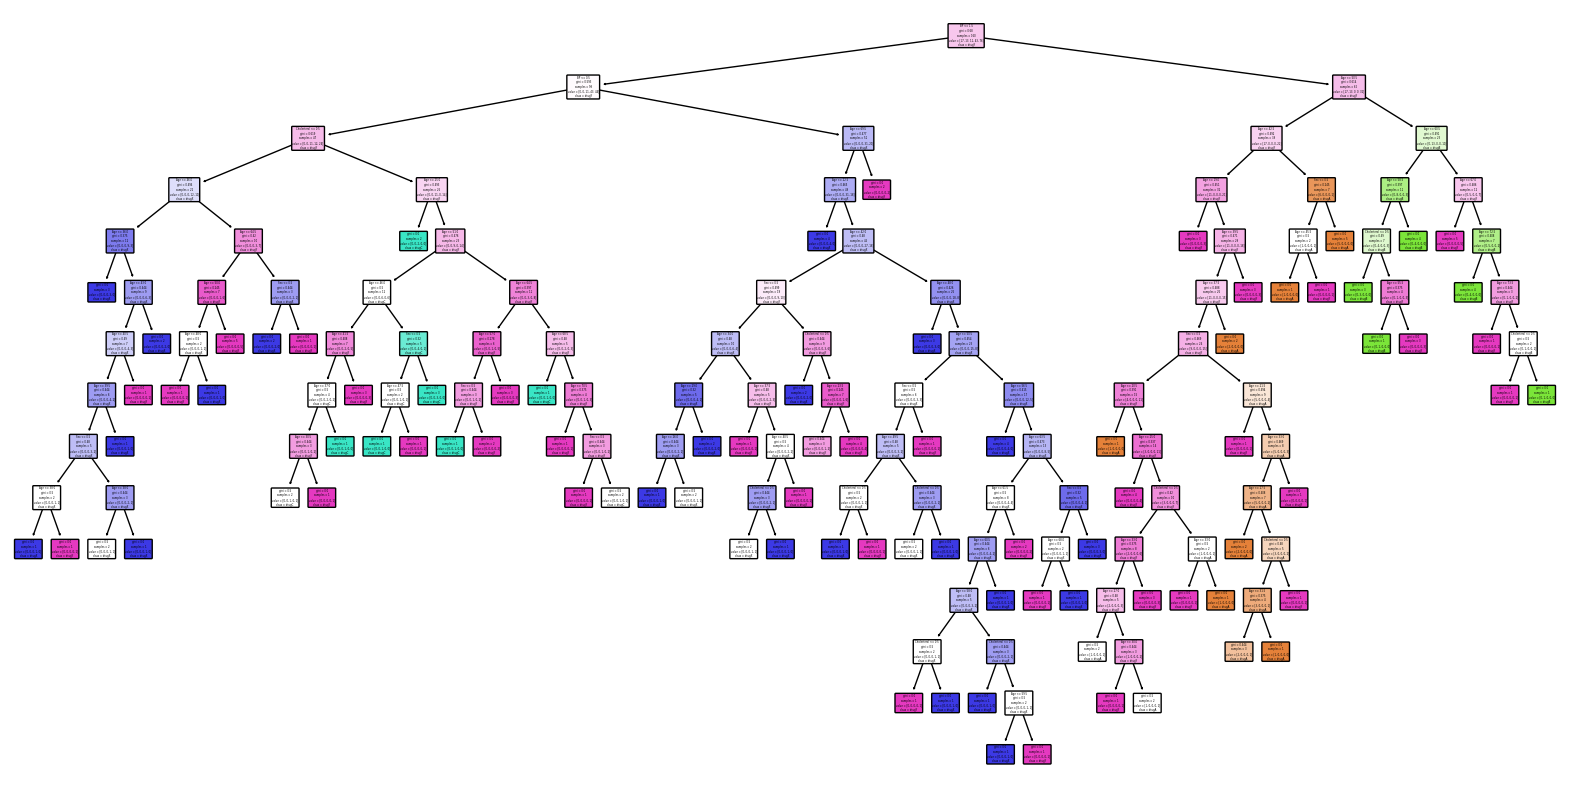

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_, rounded=True)
plt.show()

10. Create a Pairplot

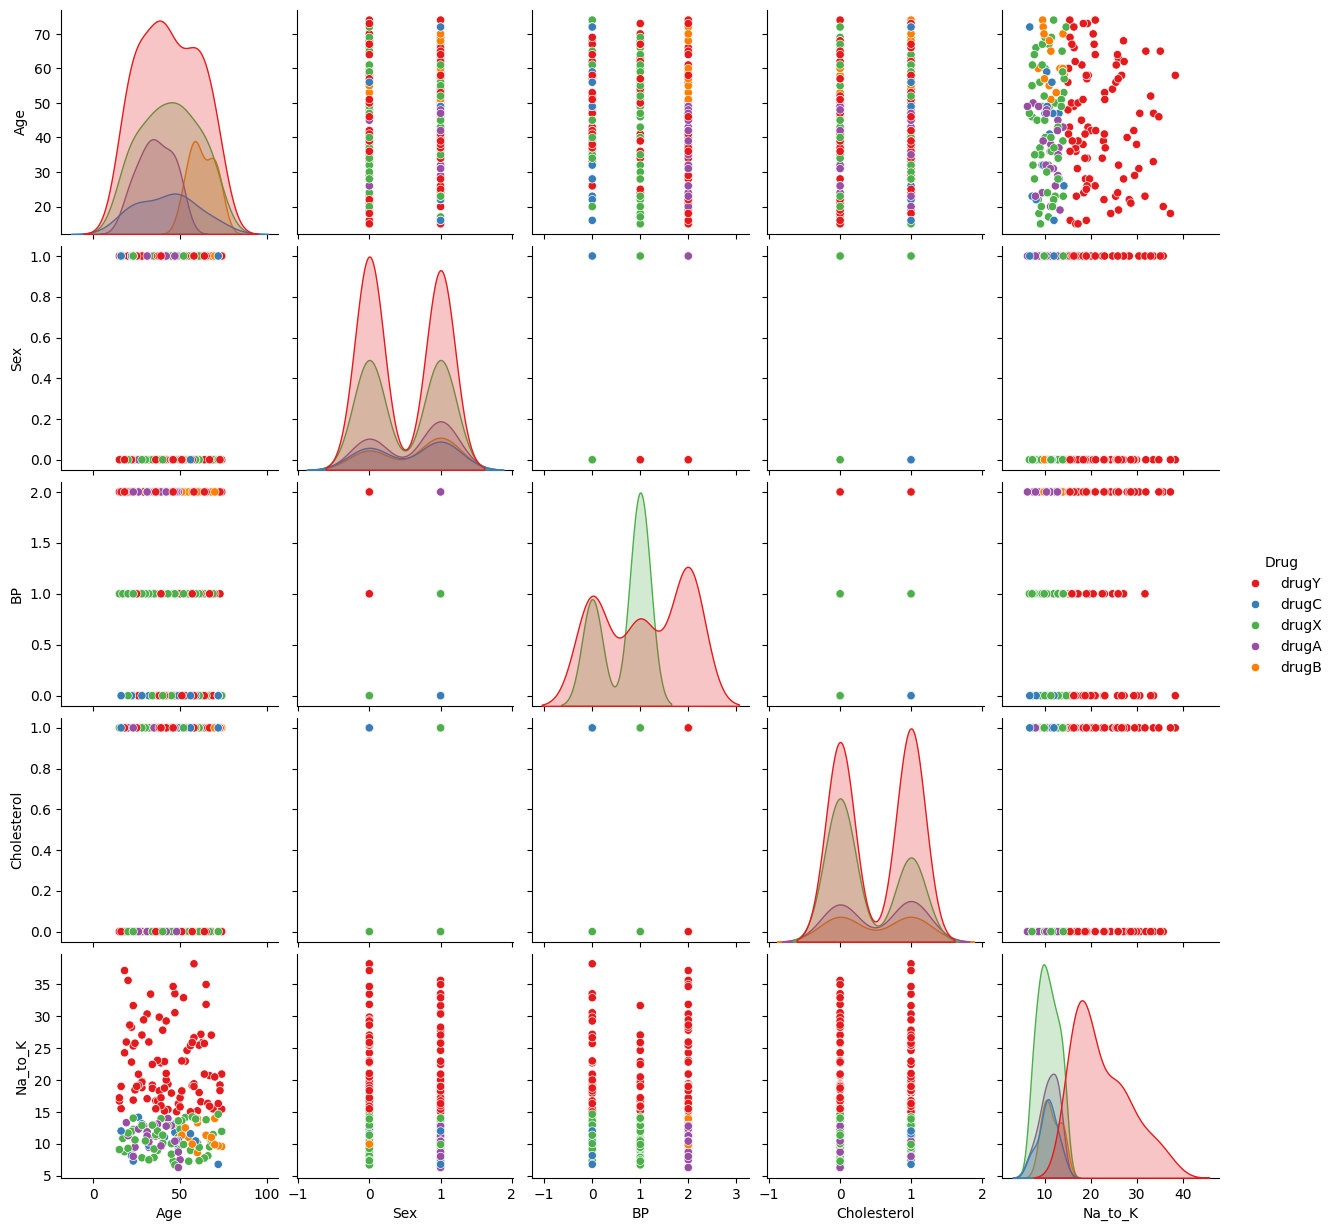

In [15]:
sns.pairplot(df, hue='Drug', palette='Set1')
plt.show()